# realdirect.com 

- Goal is to improve buying + sellling experience by providing data. Publicly available data is typically old news with ~3-month lag, so ideally, they can provide real time data to collect up to date information on things like when ppl start searching for home, initial offer, time between offer and close, how ppl search for home, etc. 
- How they make money:
    - Sellers can pay a subscription fee of $395 for them to act as a broker. Sellers will show the house themselves still but realdirect will help get the listing maximum visibility
    - Sellers can choose a full service brokerage by paying a 2% commission fee
- Have to log in to start browsing listings as a buyer. This is because of NY law. Would be interesting to log what proportion of users actually create an account to start browsing
- Optimize search by adding filters that users are usually most likely to be interested in like schools, parks, stc.
- Metrics & research questions: 
    - time buyers spent browsing listings + ctr + interests shown
    - proportion of converted deals
    - which plan do sellers typically go with
    - is there a significant diff in conversion rate between each seller plan
    - for sellers to sign up, they have to see that it could be worth it. Instead of just showing success stories, can we display some of the success metrics in a consumable way for the sellers?
    

In [184]:
import zipfile
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sweetviz
import numpy as np


# Read

In [140]:
with zipfile.ZipFile('dds_datasets/dds_ch2_rollingsales.zip') as zip_f:
    with zip_f.open('rollingsales_manhattan.xls') as myZip:
        data1 = pd.read_excel(myZip) 

# Cleaning

In [141]:
data1.columns = data1.iloc[3]
data1 = data1.iloc[4:]

In [142]:
data1.rename(columns={'APART\nMENT\nNUMBER':'APARTMENT NUMBER',
                      'SALE\nPRICE':'SALE PRICE'}, inplace=True)

data1['BOROUGH'] = data1['BOROUGH'].astype(int)
data1['NEIGHBORHOOD'] = data1['NEIGHBORHOOD'].str.strip()
data1['NEIGHBORHOOD'] = data1['NEIGHBORHOOD'].replace('' ,np.nan)
data1['BUILDING CLASS CATEGORY'] = data1['BUILDING CLASS CATEGORY'].str.strip()
data1['BUILDING CLASS CATEGORY'] = data1['BUILDING CLASS CATEGORY'].replace('' ,np.nan)
data1['TAX CLASS AT PRESENT'] = data1['TAX CLASS AT PRESENT'].astype(str)
data1['TAX CLASS AT PRESENT'] = data1['TAX CLASS AT PRESENT'].str.strip()
data1['TAX CLASS AT PRESENT'] = data1['TAX CLASS AT PRESENT'].replace('', np.nan)
data1['EASE-MENT'] = data1['EASE-MENT'].str.strip()
data1['EASE-MENT'] = data1['EASE-MENT'].replace('' ,np.nan)
data1['BUILDING CLASS AT PRESENT'] = data1['BUILDING CLASS AT PRESENT'].astype(str)
data1['BUILDING CLASS AT PRESENT'] = data1['BUILDING CLASS AT PRESENT'].str.strip()
data1['BUILDING CLASS AT PRESENT'] = data1['BUILDING CLASS AT PRESENT'].replace('', np.nan)
data1['APARTMENT NUMBER'] = data1['APARTMENT NUMBER'].astype(str)
data1['APARTMENT NUMBER'] = data1['APARTMENT NUMBER'].str.strip()
data1['APARTMENT NUMBER'] = data1['APARTMENT NUMBER'].replace('', np.nan)
data1['BUILDING CLASS AT TIME OF SALE'] = data1['BUILDING CLASS AT TIME OF SALE'].astype(str)


data1['BLOCK'] = data1['BLOCK'].astype(int)
data1['LOT'] = data1['LOT'].astype(int)
data1['ZIP CODE'] = data1['ZIP CODE'].astype(int)
data1['ZIP CODE'] = data1['ZIP CODE'].replace(0, np.nan)
data1['RESIDENTIAL UNITS'] = data1['RESIDENTIAL UNITS'].astype(int)
data1['COMMERCIAL UNITS'] = data1['COMMERCIAL UNITS'].astype(int)
data1['TOTAL UNITS'] = data1['TOTAL UNITS'].astype(int)
data1['LAND SQUARE FEET'] = data1['LAND SQUARE FEET'].astype(int)
data1['GROSS SQUARE FEET'] = data1['GROSS SQUARE FEET'].astype(int)
data1['YEAR BUILT'] = data1['YEAR BUILT'].astype(int)
data1['TAX CLASS AT TIME OF SALE'] = data1['TAX CLASS AT TIME OF SALE'].astype(int)
data1['SALE PRICE'] = data1['SALE PRICE'].astype(float)

data1['RESIDENTIAL UNITS'] = data1['RESIDENTIAL UNITS'].replace(0, np.nan)
data1['COMMERCIAL UNITS'] = data1['COMMERCIAL UNITS'].replace(0, np.nan)
data1['TOTAL UNITS'] = data1['TOTAL UNITS'].replace(0, np.nan)
data1['LAND SQUARE FEET'] = data1['LAND SQUARE FEET'].replace(0, np.nan)
data1['GROSS SQUARE FEET'] = data1['GROSS SQUARE FEET'].replace(0, np.nan)
data1['YEAR BUILT'] = data1['YEAR BUILT'].replace(0, np.nan)
data1['TAX CLASS AT TIME OF SALE'] = data1['TAX CLASS AT TIME OF SALE'].replace(0, np.nan)
data1['SALE PRICE'] = data1['SALE PRICE'].replace(0, np.nan)


data1['SALE DATE'] = pd.to_datetime(data1['SALE DATE'])


data1 = data1.reset_index(drop=True)

In [ ]:
data1['sales_log'] = np.log(data1['SALE PRICE'])

In [195]:
#data1.to_csv('cleaned_rollingsales_manhattan.csv', index=False)

# EDA

- Only one unique value for borough
- Ease-ment should be dropped since it contains no data
- Variables with heavy tails + outliers:
    - RESIDENTIAL UNITS
    - COMMERCIAL UNITS
    - TOTAL UNITS
    - LAND SQUARE FEET
    - GROSS SQUARE FEET
    - SALE PRICE
- Sale price has positive pearson correlation with the units and square feet variables. Also, correlation with building class category and neighborhood
- Sale price has some very small values (1, 100, etc.)

In [185]:
report = sweetviz.analyze(data1)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [231]:
data1['SALE PRICE'].describe()

count    1.980200e+04
mean     2.556609e+06
std      1.916295e+07
min      1.000000e+00
25%      3.676662e+05
50%      7.400000e+05
75%      1.627399e+06
max      1.307965e+09
Name: SALE PRICE, dtype: float64

In [241]:
# only keep realistic looking sale prices
clean_df = data1[data1['SALE PRICE']>=100000].copy()

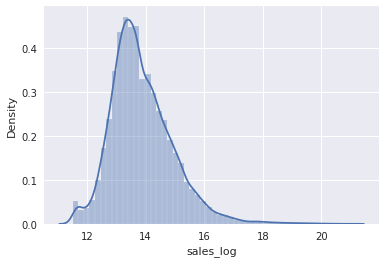

In [249]:
sns.distplot(clean_df['sales_log'])

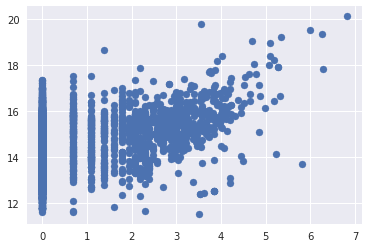

In [245]:
plt.scatter(np.log(clean_df['RESIDENTIAL UNITS']), clean_df['sales_log'])

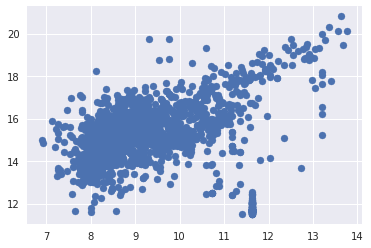

In [246]:
plt.scatter(np.log(clean_df['GROSS SQUARE FEET']), clean_df['sales_log'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

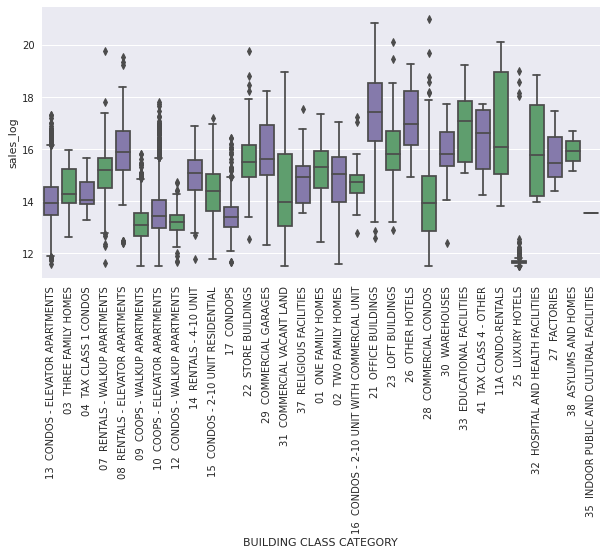

In [247]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.boxplot(x="BUILDING CLASS CATEGORY", y="sales_log", palette=["m", "g"],
            data=clean_df, ax=ax)
plt.xticks(rotation=90)

Shape of your Data Set: (27395, 21)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  2
    21 Predictors classified...
        This does not include the Target column(s)
        9 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 36


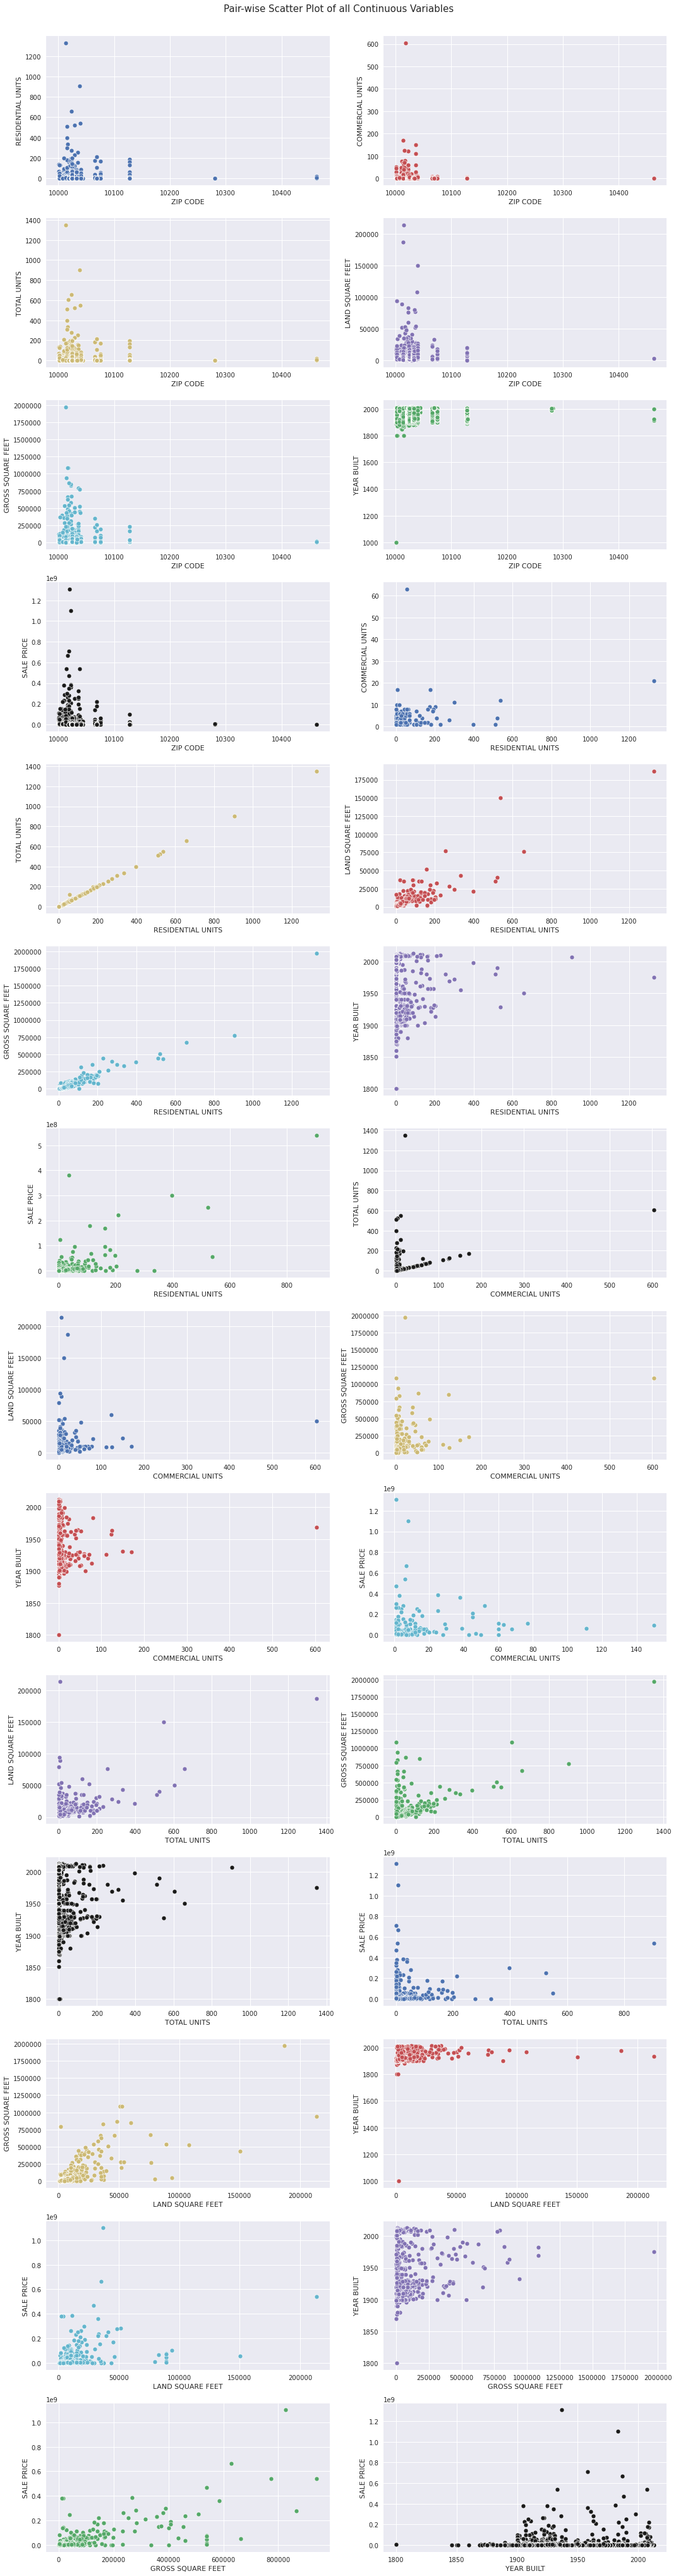

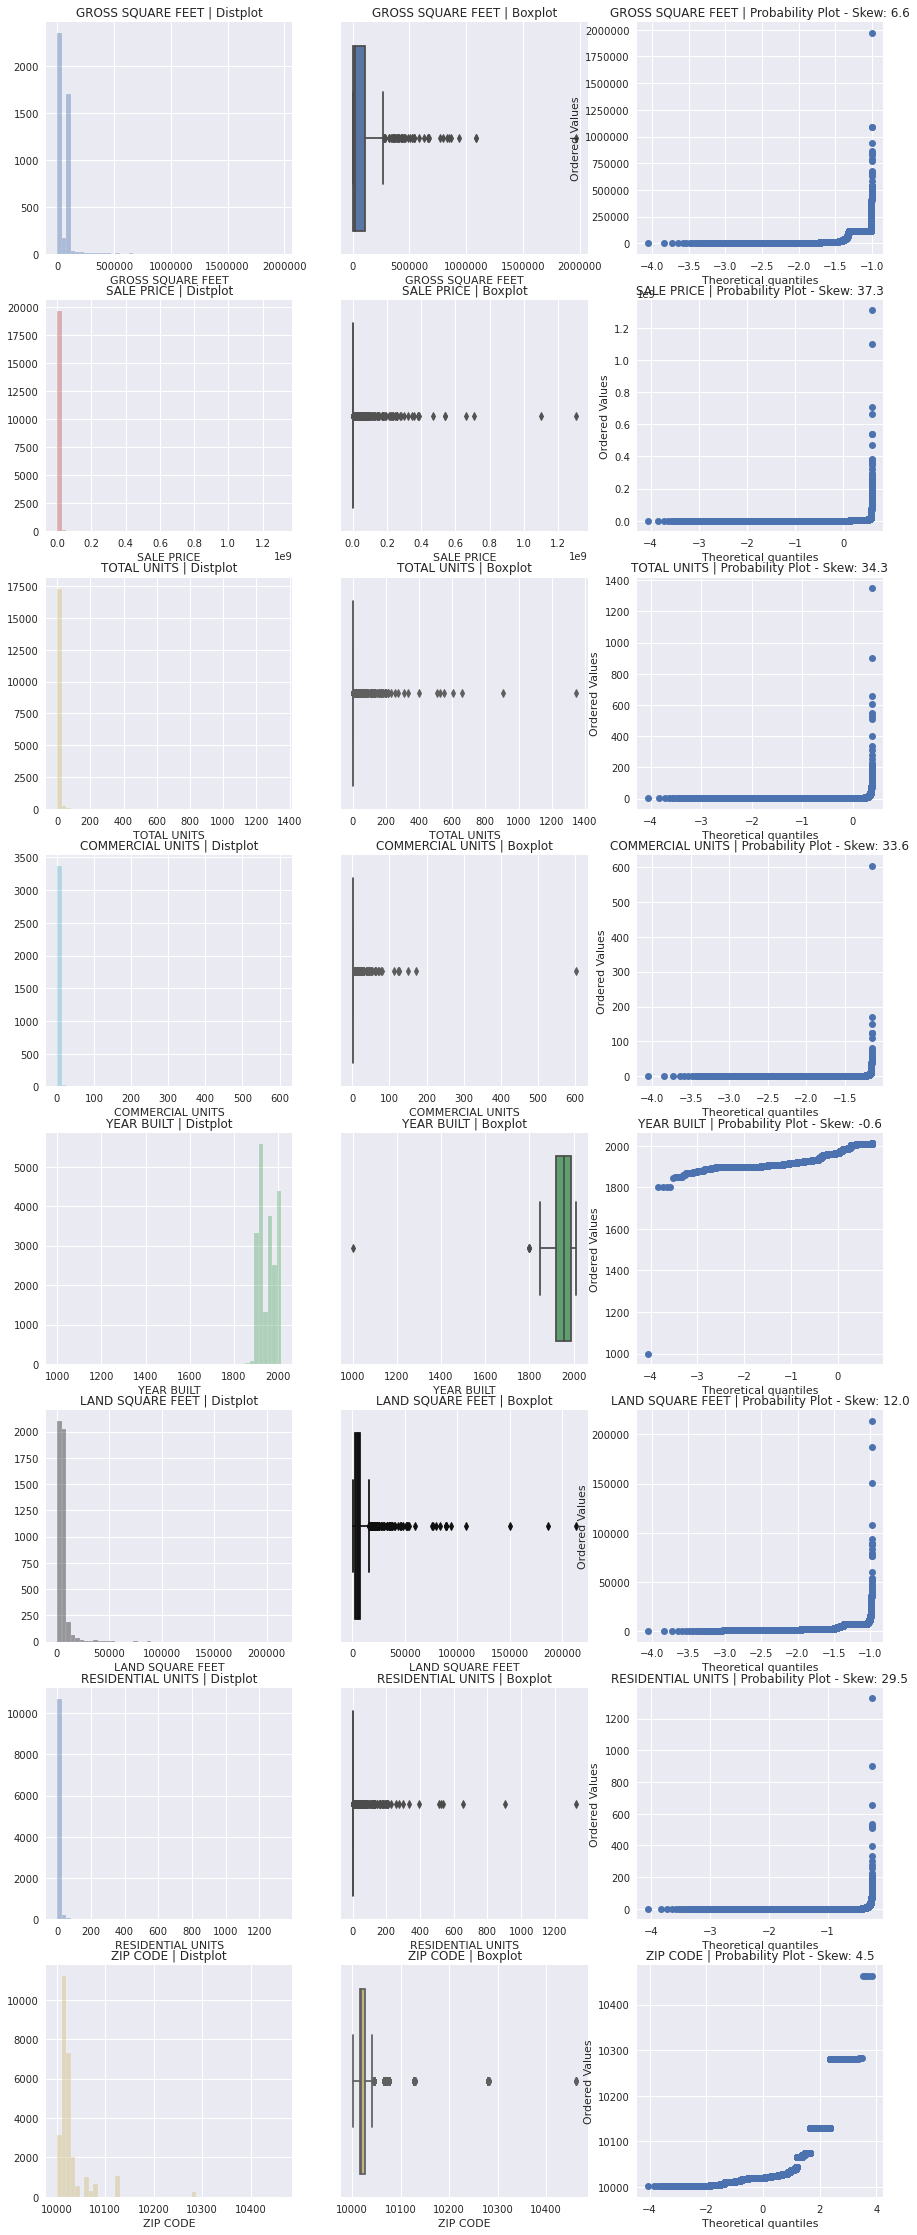

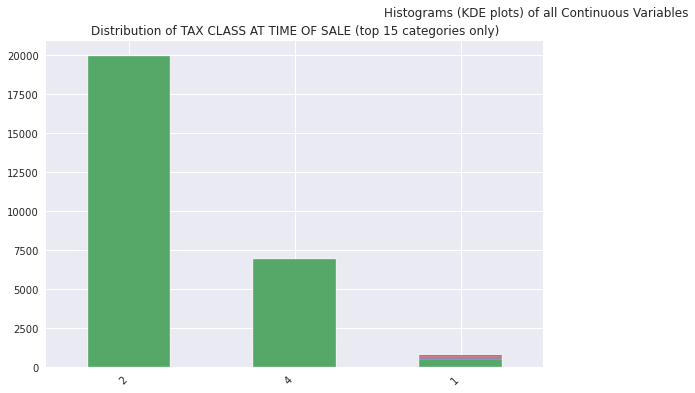

Could not draw Violin Plot


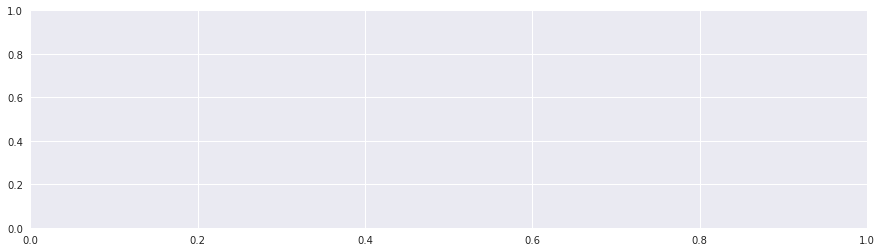

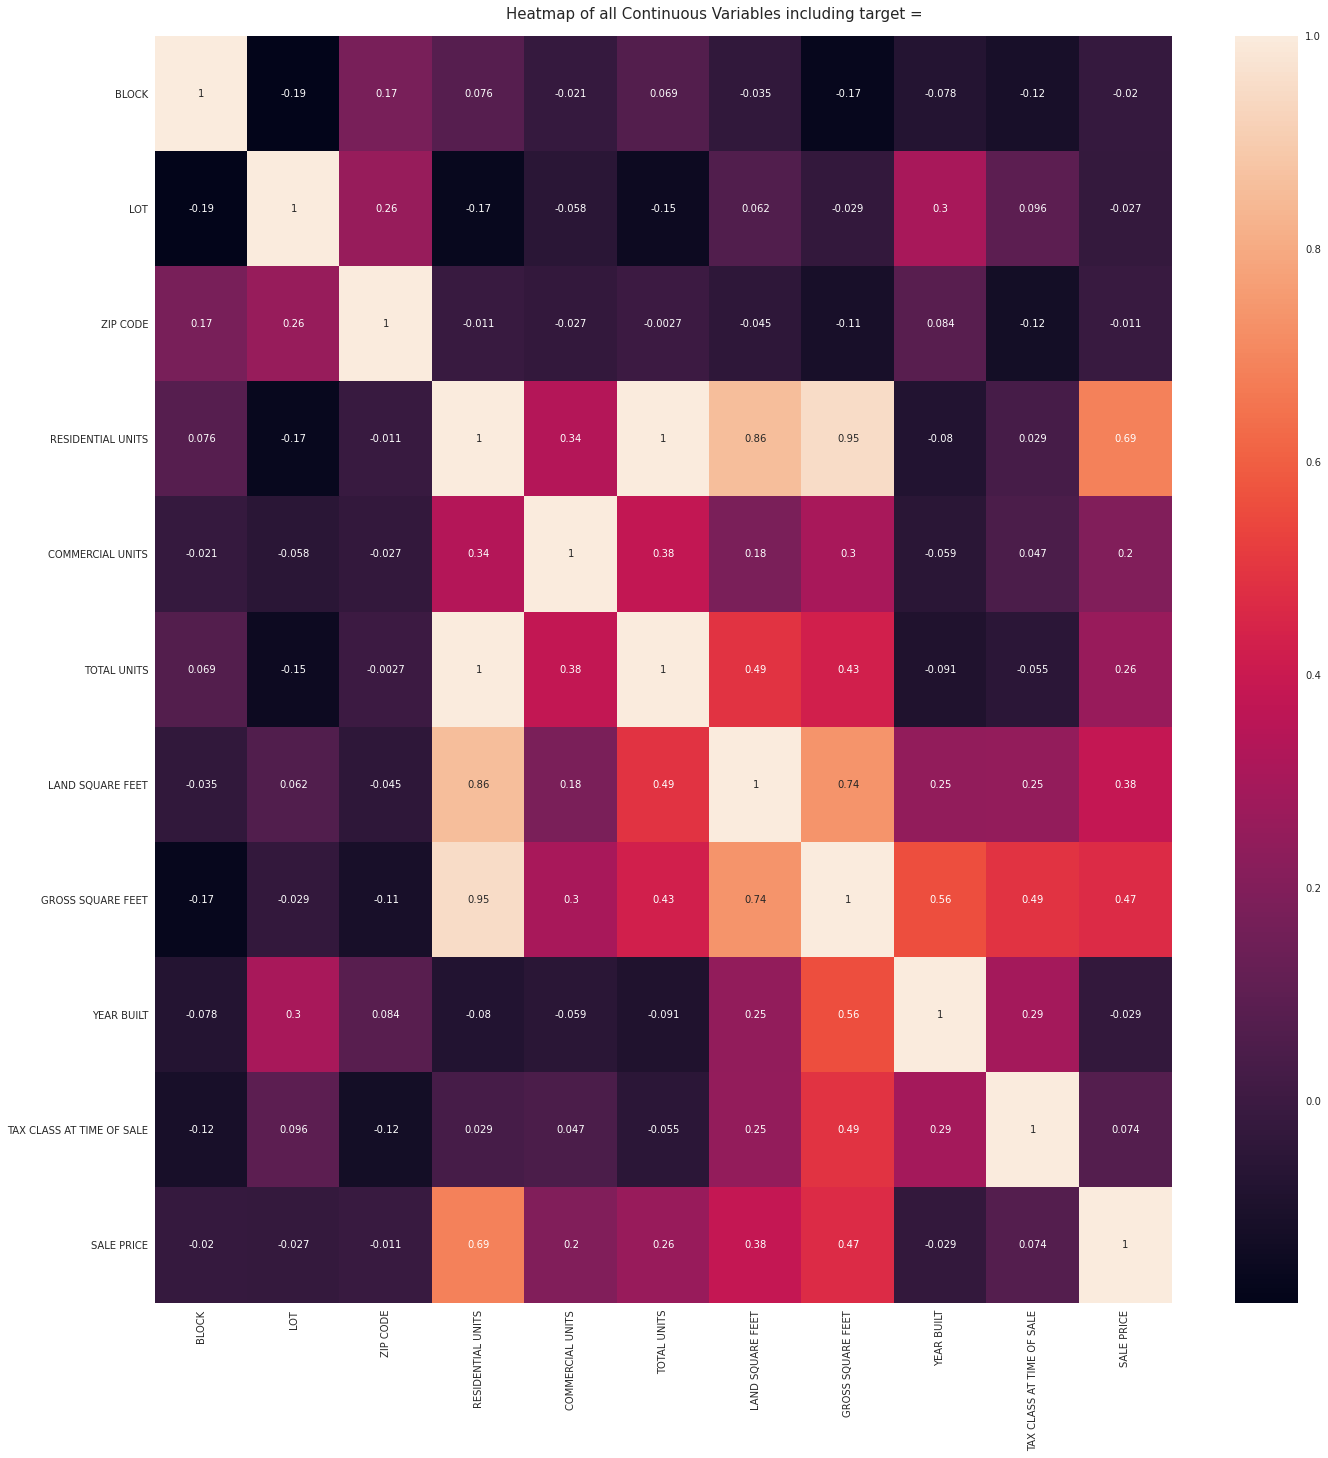

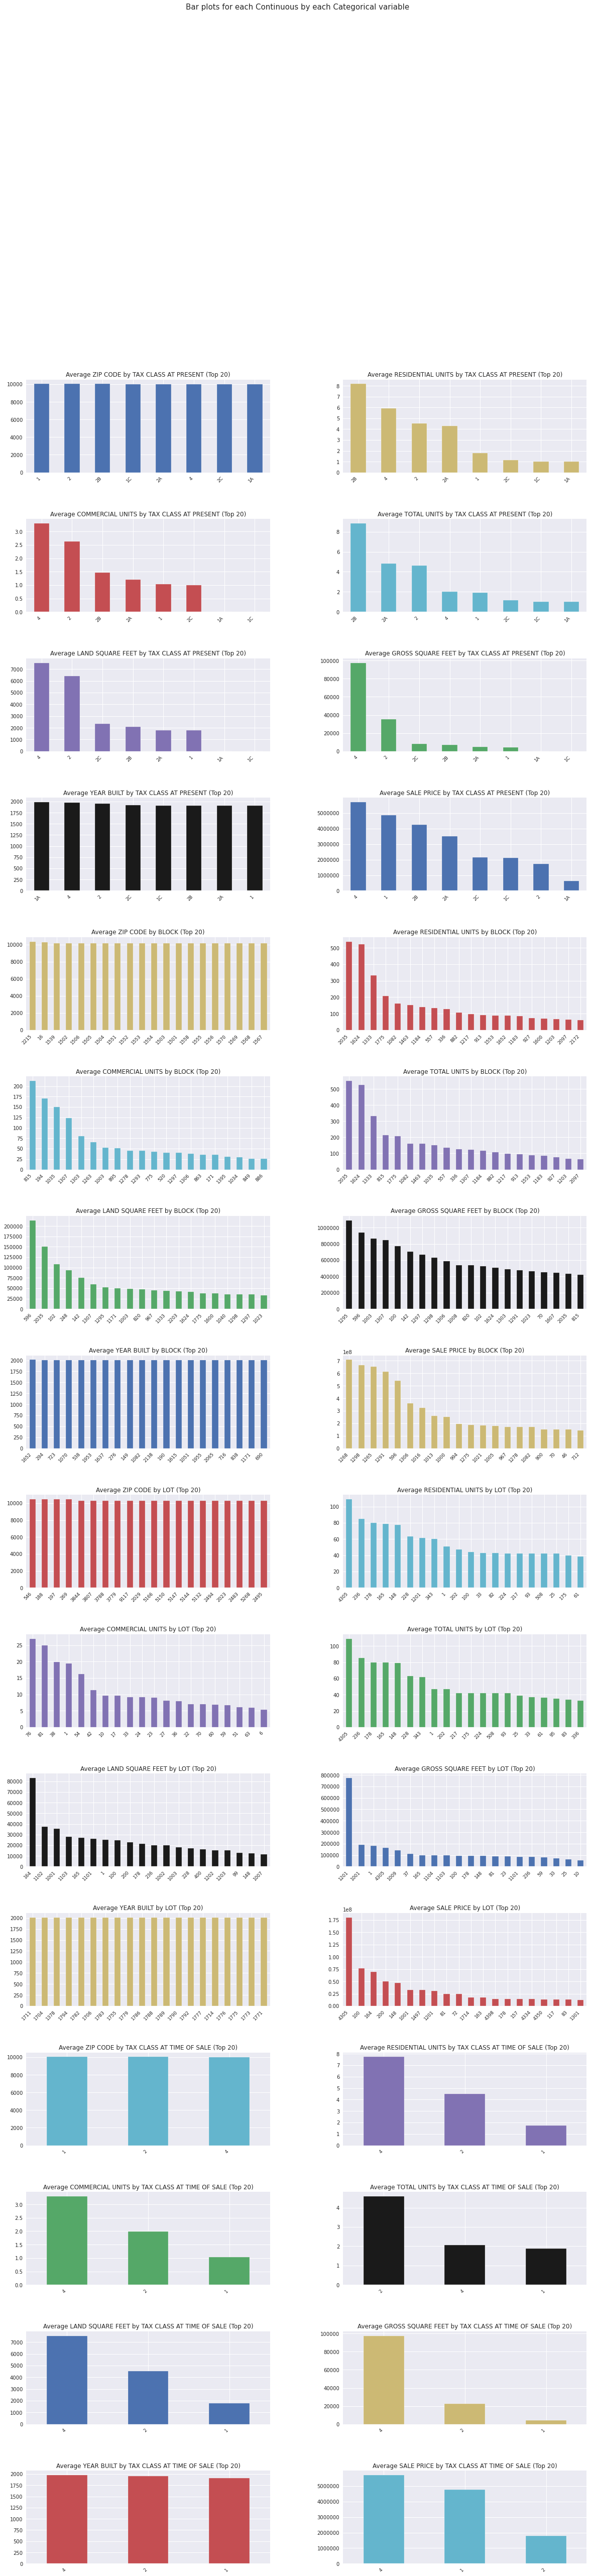

Time to run AutoViz (in seconds) = 16.054

 ###################### VISUALIZATION Completed ########################


,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,NaN,738,1306,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2214693.0
1,NaN,738,1307,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1654656.0
2,NaN,738,1308,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1069162.0
3,NaN,738,1309,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1374637.0
4,NaN,738,1310,10014.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1649565.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27390,4,2170,400,10040.0,NaN,NaN,NaN,16217.0,NaN,NaN,4,NaN
27391,4,2180,75,10033.0,NaN,NaN,NaN,4150.0,NaN,NaN,4,495000.0
27392,4,2180,75,10033.0,NaN,NaN,NaN,4150.0,NaN,NaN,4,NaN
27393,4,2180,76,10033.0,NaN,NaN,NaN,760.0,NaN,NaN,4,NaN


In [196]:
# trying out autoviz

# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# AV.AutoViz('cleaned_rollingsales_manhattan.csv')